In [4]:
# Importation des librairies numpy pour les calculs numériques
import numpy as np
# Importation des librairies pandas pour mieux gérer les données de manière vectorielles et matricielles
import pandas as pd
# Importation des librairies pyplot pour les traitements de graphes
import matplotlib.pyplot as plt

In [10]:
# On charge le dataset
house_data = pd.read_csv("house.csv")
house_data[:10]
house_data.shape

house_data.head()

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70


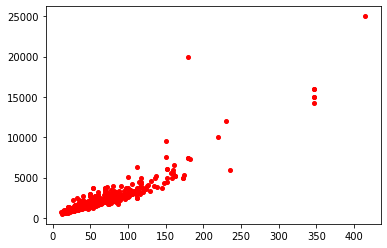

In [16]:
# On affiche le nuage de points dont-on dispose
plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)
plt.show()
# Nous remarquons que les données suivent sensiblement une droite, donc nous pouvons utiliser 
# de la regression linéaire
# Nous remarquons que lorsque la surface devient très grande, les données sembelent devenir moins
# modélisable facilement

In [17]:
# Nous allons prédire les loyers de moins de 10 000 euro
house_data = house_data[house_data['loyer'] < 10000]

In [23]:
# On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
X = np.matrix([np.ones(house_data.shape[0]), house_data['surface'].values]).T
y = np.matrix(house_data['loyer']).T

# On effectue le calcul exact du paramètre theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta)

[[266.45460292]
 [ 30.66119596]]


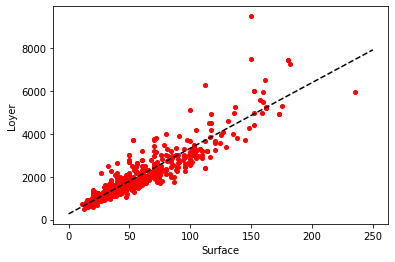

In [27]:
plt.xlabel('Surface')
plt.ylabel('Loyer')

plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)

# On affiche la droite entre 0 et 250
plt.plot([0,250], [theta.item(0),theta.item(0) + 250 * theta.item(1)], linestyle='--', c='#000000')

plt.show()

In [28]:
# Permet de prédire le loyer d'une surface de 35 mètre cube
theta.item(0) + theta.item(1) * 35

1339.5964615602245

In [29]:
# importer la librairie linear_model depuis la librairie scikit-learn
from sklearn import linear_model
# Définir notre model de regression linéaire
regr = linear_model.LinearRegression()
regr.fit(X, y)
# regr.predict(<des données de test>)

/home/ismael/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/ismael/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


LinearRegression()

In [34]:
house = pd.read_csv("house_data.csv")
# Résumé des données brutes
house.describe()

,price,surface,arrondissement
count,827.000000,822.000000,822.000000
mean,2007.342201,58.045925,4.142336
std,1890.894229,44.827522,3.202151
min,390.000000,10.000000,1.000000
25%,1050.000000,28.655000,2.000000
50%,1567.000000,46.100000,3.000000
75%,2346.000000,73.000000,4.000000
max,25000.000000,415.000000,10.000000


In [38]:
# Il y a quelques valeurs manquantes, on supprime ces lignes
data_na = house.dropna()

# Comme vu dans le TP, on a des outliers sur les grands propriétés
data = data_na[data_na["price"] < 8000]

# On reindexe
data = data.reset_index(drop = True)


,price,surface,arrondissement
0,1820,46.10,1.0
1,1750,41.00,1.0
2,1900,55.00,1.0
3,1950,46.00,1.0
4,1950,49.00,1.0
...,...,...,...
807,850,35.00,10.0
808,700,10.00,10.0
809,1280,34.00,10.0
810,1545,65.00,10.0


<AxesSubplot:xlabel='price', ylabel='surface'>

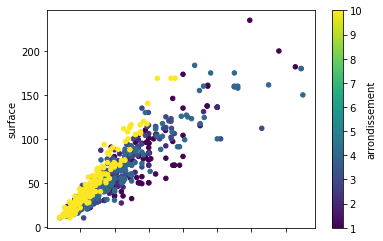

In [39]:
# On affiche les données nettoyées
data.plot.scatter("price", "surface", c="arrondissement", colormap='viridis')

/home/ismael/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


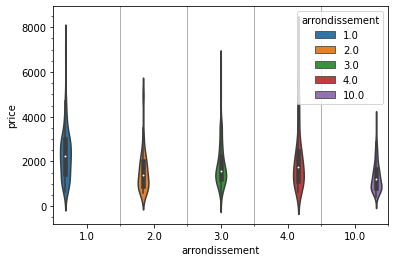

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator

%matplotlib inline

ax1 = sns.violinplot("arrondissement", "price", data=data, hue='arrondissement')
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(which='minor', axis='x', linewidth=1)

/tmp/ipykernel_8089/3013361500.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  fig = plt.figure().gca(projection='3d')


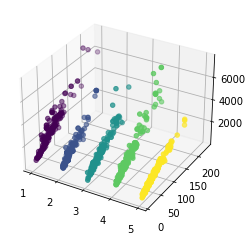

In [43]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure().gca(projection='3d')

# Pour faciliter la visualisation, on va changer la valeur de l'arrondissement (10)
tmp_arr = data['arrondissement'][:]
tmp_arr[tmp_arr == 10] = 5

fig.scatter(tmp_arr, data['surface'], data['price'], c=tmp_arr, cmap="viridis")
plt.show()

In [44]:
xtrain, xtest, ytrain, ytest = train_test_split(data[["surface", "arrondissement"]], data[["price"]], test_size=0.3)

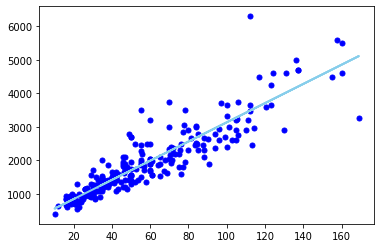

In [46]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_baseline = lr.fit(xtrain[["surface"]], ytrain)
baseline_pred = lr_baseline.predict(xtest[["surface"]])

plt.plot(xtest[["surface"]], ytest, 'bo', markersize = 5)
plt.plot(xtest[["surface"]], baseline_pred, color="skyblue", linewidth = 2)

In [48]:
def sumsq(x,y):
    return sum((x - y)**2)

def r2score(pred, target):
    return 1 - sumsq(pred, target) / sumsq(target, np.mean(target))

score_bl = r2score(baseline_pred[:,0], ytest['price'])

print(score_bl)

0.8121513743937745


In [50]:
lrs = []
for i in np.unique(xtrain["arrondissement"]):
    
    # On génère un jeu de données par arrondissement
    tr_arr = xtrain['arrondissement']==i
    te_arr = xtest['arrondissement']==i
    
    xtrain_arr = xtrain[tr_arr]
    ytrain_arr = ytrain[tr_arr]

    xtest_arr = xtest[te_arr]
    ytest_arr = ytest[te_arr]

    lr = LinearRegression()
    lr.fit(xtrain_arr[["surface"]], ytrain_arr)
    lrs.append(lr)

In [51]:
final_pred = []

for idx,val in xtest.iterrows():
    final_pred.append(lrs[int(val["arrondissement"]-1)].predict([[val["surface"]]])[0][0])
    
r2score(final_pred, ytest["price"])

/home/ismael/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/ismael/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/ismael/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/ismael/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/ismael/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/ismael/.local/lib/python3.8/site-packages/sklearn/base.py:4

0.8352381357742682

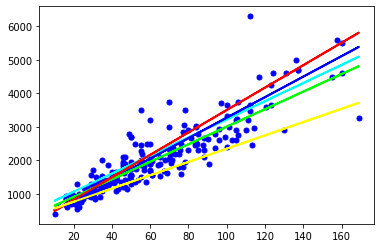

In [52]:
plt.plot(xtest[["surface"]], ytest, 'bo', markersize = 5)
plt.plot(xtest[["surface"]], lrs[0].predict(xtest[["surface"]]), color="#00FFFF", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[1].predict(xtest[["surface"]]), color="#0000FF", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[2].predict(xtest[["surface"]]), color="#00FF00", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[3].predict(xtest[["surface"]]), color="#FF0000", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[4].predict(xtest[["surface"]]), color="#FFFF00", linewidth = 2)